# Monte Carlo Techniques

In [3]:
# standard preamble
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline    

In [4]:
"""
Near the end of Workshop05 we have a formula that involves a fourth-order central moment.

The term "error in the estimate of the error" is overly dramatic.
Really we should say the "error in the estimate of sigma," as shown below.
For example: sigma=0.96+/-0.04  is very successful because we used a distribution
function with sigma=1 (called "scale=1" below).

Sample Variance Distribution
http://mathworld.wolfram.com/SampleVarianceDistribution.html
http://mathworld.wolfram.com/CentralMoment.html
"""

from scipy.stats import norm

# Generate 1000 events from a normal distrubution
# with actual mean 0 and actual standard deviation 1.
# Then by looking at just the 1000 values, try to determine what mean and sigma were used.
sample = norm.rvs(loc=0,scale=1,size=1000) 

N=len(sample)
mean = np.mean(sample)
sigma = np.sqrt(np.sum((sample-mean)**2)/N)
eMean = sigma/np.sqrt(N)
eSigma=np.sqrt((np.sum((sample-mean)**4)/N-(N-3)/(N-1)*sigma**4)/N)
print ('Max-likelihood estimate of mean={0:4.2f}+/-{1:4.2f}'.format(mean,eMean))
print ('Max-likelihood estimate of sigma={0:4.2f}+/-{1:4.2f}'.format(sigma,eSigma))

Max-likelihood estimate of mean=0.02+/-0.03
Max-likelihood estimate of sigma=1.00+/-0.04


## Example: Linear Congruent Generator

In [1]:
myRandomSeed = 504
def myRandom(a=65539, b=0, c=int(2**31-1)):
    global myRandomSeed
    x = (a*myRandomSeed+b) % c
    myRandomSeed = x
    return x

out = ""
for i in range(5):
    out += str(myRandom())
    out += " "
    
print (out)
    
out = ""
myRandomSeed = 1
for i in range(20):
    out += str(myRandom(a=5, b=3, c=8))
    out += " "

print (out)

33031656 198186408 957896856 65108986 127826865 
0 3 2 5 4 7 6 1 0 3 2 5 4 7 6 1 0 3 2 5 


## Example: Python random numbers

In [34]:
# integer random number between [a..b]
print (np.random.randint(0,2**32-1))

1438554903


In [6]:
def multipleRolls(n):
    """Useful for a homework problem"""
    return np.random.randint(1,7,n)

In [7]:
multipleRolls(20)

array([1, 3, 4, 5, 4, 5, 6, 2, 6, 2, 2, 3, 3, 1, 3, 6, 2, 6, 4, 1])

[[4 4]
 [2 5]
 [6 5]
 [5 2]
 [4 5]
 [3 2]
 [5 6]
 [2 5]
 [5 1]
 [5 5]]
(10, 2)
(10,)


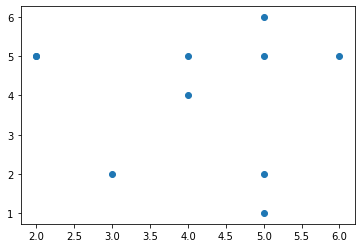

In [8]:
# demonstrate a more complicated object that can be passed in when calling the function
temp=multipleRolls((10,2))
print(temp)
print(temp.shape)
plt.scatter(temp[:,0],temp[:,1])
temp2=temp[:,0]
print(temp2.shape)

[[4 2 6 5 4 3 5 2 5 5]
 [4 5 5 2 5 2 6 5 1 5]]


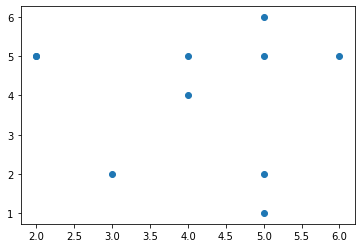

In [9]:
temp3=temp.transpose()
print(temp3)
plt.scatter(*temp3) # Note how simple this line is!

In [35]:
# float random number between [0..1)
print (np.random.random())

0.6276031333823048


In [36]:
# float random number between [a..b)
print (np.random.uniform(5,10))

8.434686645943689


In [37]:
# Choose a random element
print (np.random.choice(['a','b','c','d','e','f','g','h','i','j']))  

g


## Example: Python random number generators

Mean = 1.999
Std. dev. = 2.036


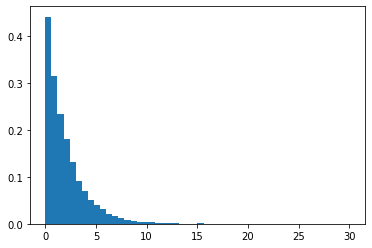

In [38]:
ds = np.random.exponential(scale=2,size=10000)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50,density=True)
plt.show()

Mean = 0.923
Std. dev. = 8.743


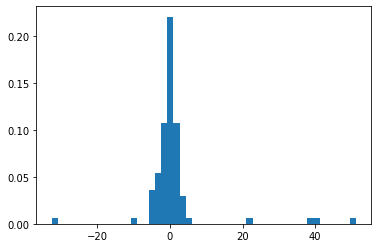

In [40]:
ds = np.random.standard_cauchy(size=100)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50,density=True)
plt.show()

Mean = 9.998
Std. dev. = 2.042


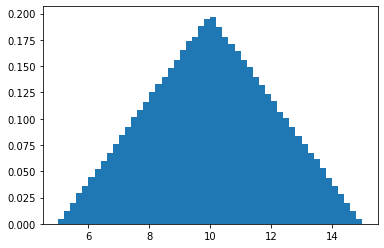

In [21]:
ds = np.random.triangular(5,10,15,size=1000000)
print('Mean = {0:5.3f}'.format(sp.mean(ds)))
print('Std. dev. = {0:5.3f}'.format(sp.std(ds)))
plt.hist(ds,50,density=True)
plt.show()